In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

from vivarium import Artifact


!date
!whoami
!pwd

Tue Nov  4 10:06:33 PST 2025
tylerdy
/mnt/share/homes/tylerdy/vivarium_research_alzheimers/plots


In [71]:
LOCATIONS = [
    "United States of America",
    "Sweden",
    "China",
    "Japan",
    "Brazil",
    "United Kingdom",
    "Germany",
    "Spain",
    "Israel",
    "Taiwan (Province of China)",
]

In [78]:
results_dir = "/snfs1/Project/simulation_science/alzheimers/results_10_31_2025"
inc = pd.read_csv(Path(results_dir) / "incidence.csv")
prev = pd.read_csv(Path(results_dir) / "prevalence.csv")
deaths = pd.read_csv(Path(results_dir) / "deaths.csv")
res = pd.concat([prev, inc, deaths])
res

,Year,Location,Age,Sex,Disease Stage,Scenario,Measure,Metric,Mean,95% UI Lower,95% UI Upper
0,2025,Brazil,25_to_29,Female,Preclinical AD,Reference,Prevalence,Number,0.000000,0.000000,0.000000
1,2025,Brazil,25_to_29,Female,MCI due to AD,Reference,Prevalence,Number,0.000000,0.000000,0.000000
2,2025,Brazil,25_to_29,Female,AD Dementia,Reference,Prevalence,Number,0.000000,0.000000,0.000000
3,2025,Brazil,25_to_29,Male,Preclinical AD,Reference,Prevalence,Number,0.000000,0.000000,0.000000
4,2025,Brazil,25_to_29,Male,MCI due to AD,Reference,Prevalence,Number,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
113995,2100,United States of America,95_plus,Male,AD Dementia,BBBM Testing and Treatment,Deaths Associated with AD,Number,7764.612990,5466.617453,10079.971108
113996,2100,United States of America,95_plus,Female,AD Dementia,BBBM Testing Only,Averted Deaths Associated with AD,Number,0.000000,0.000000,0.000000
113997,2100,United States of America,95_plus,Male,AD Dementia,BBBM Testing Only,Averted Deaths Associated with AD,Number,0.000000,0.000000,0.000000
113998,2100,United States of America,95_plus,Female,AD Dementia,BBBM Testing and Treatment,Averted Deaths Associated with AD,Number,-81.315146,-138.475470,-37.700393


In [36]:
def get_loc_ref(df, location, measure):
    return df.query(
        f"Location == '{location}' & Scenario == 'Reference' & Measure == '{measure}' & Metric == 'Number'"
    )[
        [
            "Year",
            "Location",
            "Age",
            "Sex",
            "Disease Stage",
            "Mean",
            "95% UI Lower",
            "95% UI Upper",
        ]
    ]

In [88]:
def ax_over_time(plot_data, lbl):

    ax = plt.gca()
    ax.plot(plot_data["Year"], plot_data["Mean"], label=lbl)
    ax.fill_between(
        plot_data["Year"],
        plot_data["95% UI Lower"],
        plot_data["95% UI Upper"],
        alpha=0.2,
    )


def plot_over_time(title: str, ylabel: str, scale="linear"):
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2025, 2101, 10))
    if scale == "linear":
        plt.ylim(bottom=0)
    plt.yscale(scale)
    plt.legend(loc=(1.01, 0))
    plt.figure()

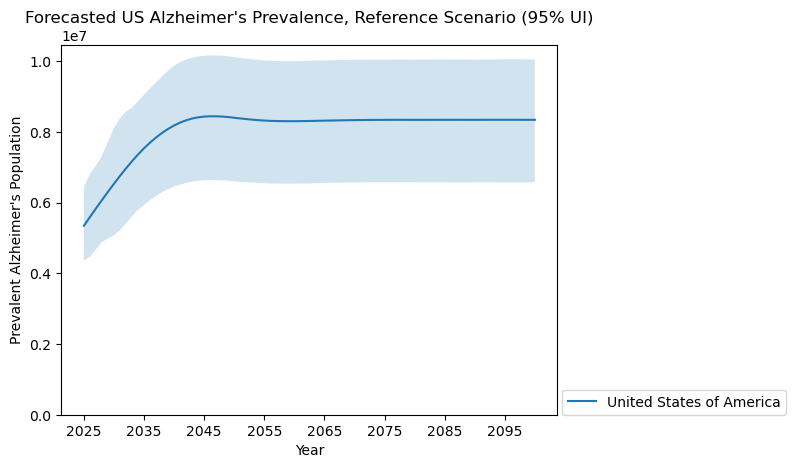

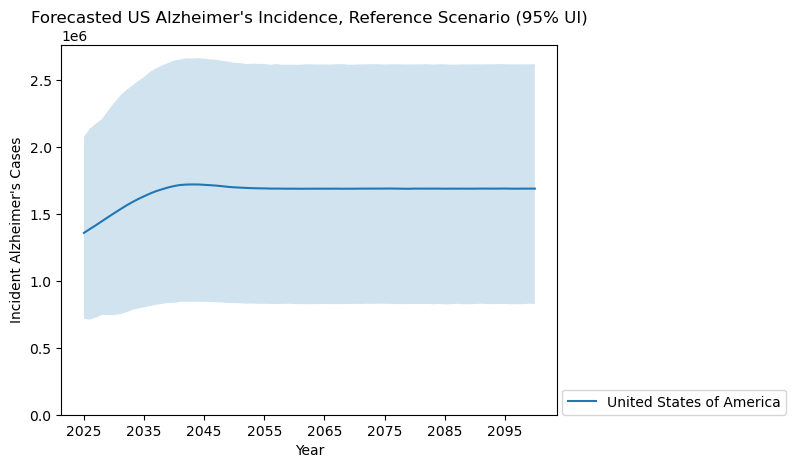

<Figure size 640x480 with 0 Axes>

In [89]:
prev__us_ref = get_loc_ref(res, "United States of America", "Prevalence")
inc__us_ref = get_loc_ref(res, "United States of America", "Incidence")

ax_over_time(
    prev__us_ref.groupby(["Year", "Location"]).sum().reset_index(),
    "United States of America",
)
plot_over_time(
    "Forecasted US Alzheimer's Prevalence, Reference Scenario (95% UI)",
    "Prevalent Alzheimer's Population",
)
ax_over_time(
    inc__us_ref.groupby(["Year", "Location"]).sum().reset_index(),
    "United States of America",
)
plot_over_time(
    "Forecasted US Alzheimer's Incidence, Reference Scenario (95% UI)",
    "Incident Alzheimer's Cases",
)

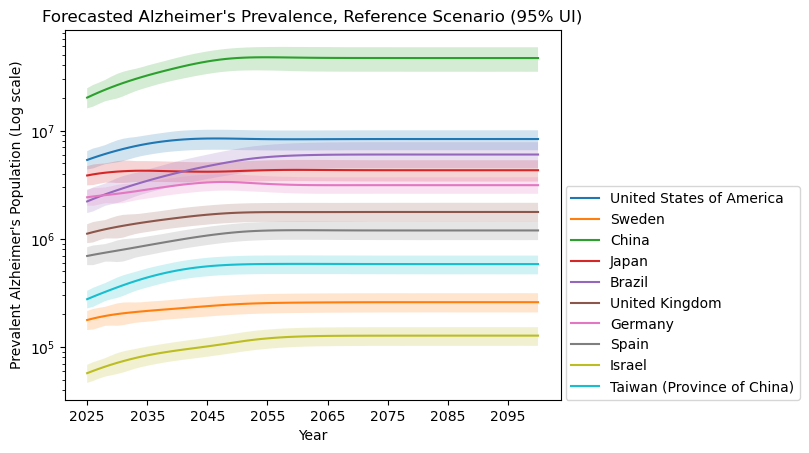

<Figure size 640x480 with 0 Axes>

In [ ]:
for loc in LOCATIONS:
    ax_over_time(
        get_loc_ref(res, loc, "Prevalence")
        .groupby(["Year", "Location"])
        .sum()
        .reset_index(),
        loc,
    )

plot_over_time(
    f"Forecasted Alzheimer's Prevalence, Reference Scenario (95% UI)",
    "Prevalent Alzheimer's Population (Log scale)",
    scale="log",
)

# end at 2050?

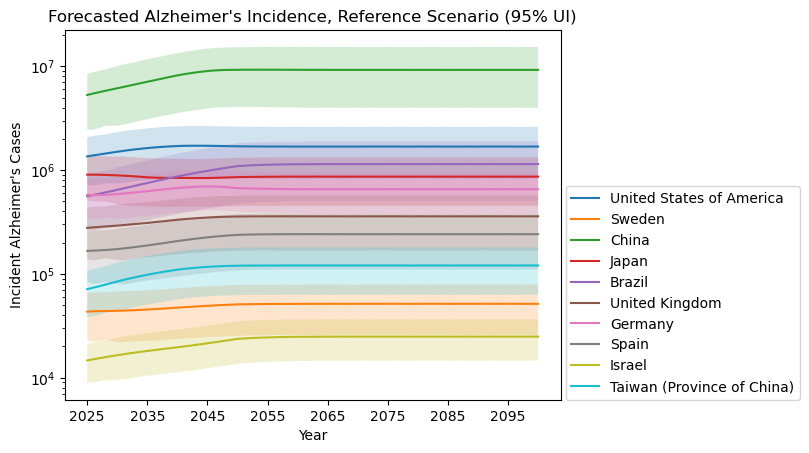

<Figure size 640x480 with 0 Axes>

In [91]:
for loc in LOCATIONS:
    ax_over_time(
        get_loc_ref(res, loc, "Incidence")
        .groupby(["Year", "Location"])
        .sum()
        .reset_index(),
        loc,
    )

plot_over_time(
    f"Forecasted Alzheimer's Incidence, Reference Scenario (95% UI)",
    "Incident Alzheimer's Cases",
    scale="log",
)